# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [10]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

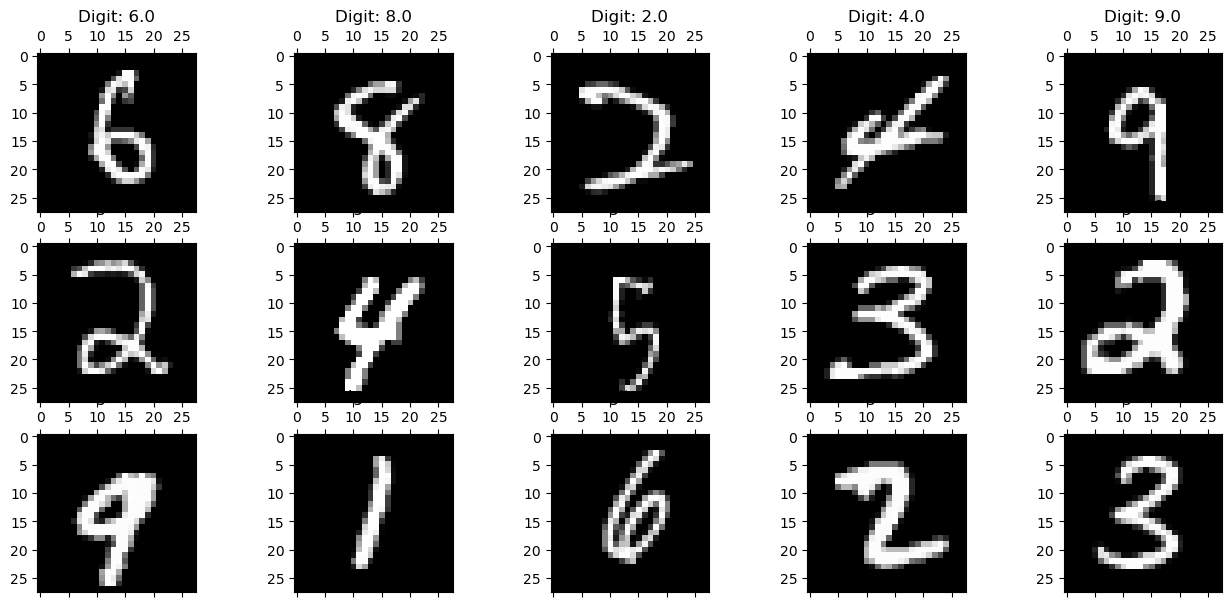

In [11]:
# 데이터 형태 시각화
rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

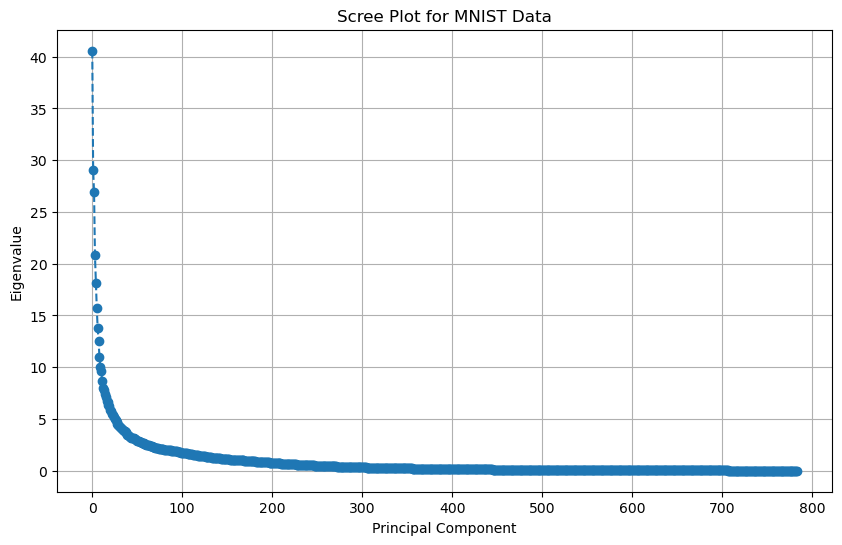

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X)

# Compute the covariance matrix
cov_matrix = np.cov(X_mnist_scaled.T)

# Compute eigenvalues and eigenvectors
eigenvalues_mnist, _ = lin.eig(cov_matrix)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues_mnist)[::-1]

# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for MNIST Data')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=717)
pca.fit(X_train)
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

/home/suhyung/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [17]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

results = dict()

models = [KNeighborsClassifier(), LogisticRegression(max_iter=1000)]
model_names = ['KNN Classification', 'Logistic Regression']

for model, name in zip(models, model_names):
    results[name] = {
        'Original': {},
        'PCA': {},
        'LDA': {}
    }
    
    # Original data
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results[name]['Original']['Time'] = end_time - start_time
    results[name]['Original']['Accuracy'] = acc
    
    # PCA data
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    end_time = time.time()
    
    y_pred_pca = model.predict(X_test_pca)
    acc_pca = accuracy_score(y_test, y_pred_pca)
    
    results[name]['PCA']['Time'] = end_time - start_time
    results[name]['PCA']['Accuracy'] = acc_pca
    
    # LDA data
    start_time = time.time()
    model.fit(X_train_lda, y_train)
    end_time = time.time()
    
    y_pred_lda = model.predict(X_test_lda)
    acc_lda = accuracy_score(y_test, y_pred_lda)
    
    results[name]['LDA']['Time'] = end_time - start_time
    results[name]['LDA']['Accuracy'] = acc_lda

/home/suhyung/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/suhyung/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/suhyung/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/suhyung/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed 

In [19]:
from pprint import pprint
pprint(results)

{'KNN Classification': {'LDA': {'Accuracy': 0.9183571428571429,
                                'Time': 0.03353595733642578},
                        'Original': {'Accuracy': 0.9717142857142858,
                                     'Time': 0.006182670593261719},
                        'PCA': {'Accuracy': 0.9717142857142858,
                                'Time': 0.017128944396972656}},
 'Logistic Regression': {'LDA': {'Accuracy': 0.8869285714285714,
                                 'Time': 0.431790828704834},
                         'Original': {'Accuracy': 0.9153571428571429,
                                      'Time': 30.81666326522827},
                         'PCA': {'Accuracy': 0.9152142857142858,
                                 'Time': 29.98238444328308}}}


특정한 틀 없이 자유롭게 해주시면 됩니다!